+------------+---------------------+----------------+----------------------+-----------------------+-------------------------------+---------------------+----------------------------------+-----------------------+
|   Customer |   Interarrival time |   Arrival time |   Service time (min) |   Time service begins |   Waiting time in queue (min) |   Time service ends |   Time customer spends in system |   Idle time of server |
+============+=====================+================+======================+=======================+===============================+=====================+==================================+=======================+
|          1 |                   0 |              0 |                    3 |                     0 |                             0 |                   3 |                                3 |                     0 |
+------------+---------------------+----------------+----------------------+-----------------------+-------------------------------+------------

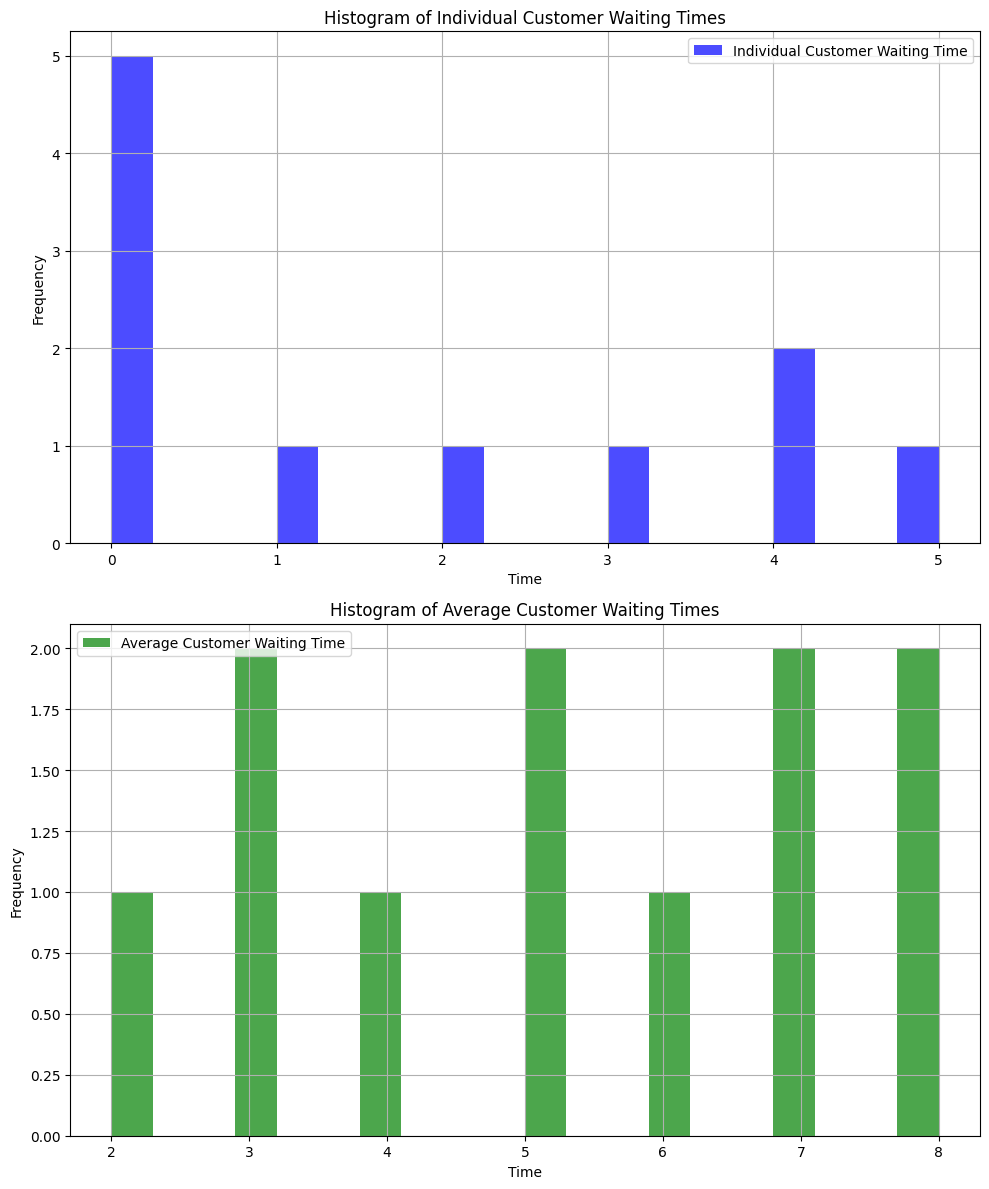

Average Waiting Time in Queue: 1.73
Probability of Waiting: 0.55
Probability of Idle Server: 0.03
Average Service Time: 3.55
Average Interarrival Time: 3.73
Average Time a Customer Spends in Queue: 1.73
Average Time a Customer Spends in System: 5.27


In [4]:
import simpy
import matplotlib.pyplot as plt
from tabulate import tabulate

# Simulation parameters
num_customers = 11
interarrival_times = [0, 8, 8, 4, 2, 1, 3, 7, 2, 1, 5]
random_service_times = [3, 3, 5, 3, 4, 2, 3, 2, 5, 4, 5]

# Function to calculate the previous customer's service end time
def prev_service_end_time(customer_data, name):
    if name == 0:
        return 0
    else:
        #customer number because customers doesn't have names registered in the system.
        return customer_data[name - 1][6]

# Function to calculate customer's arrival time
def calculate_arrival_times(interarrival_times):
    arrival_times = [0]
    for i in range(1, len(interarrival_times)):
        arrival_times.append(arrival_times[i - 1] + interarrival_times[i])
    return arrival_times

# Simulation function
def customer(env, name, arrival_time, service_time):
    yield env.timeout(arrival_time)
    
    prev_end_time = prev_service_end_time(data, name)
    service_start_time = max(arrival_time, prev_end_time)
    service_end_time = service_start_time + service_time
    
    waiting_time_in_queue = service_start_time - arrival_time
    
    data[name] = [
        name + 1,
        interarrival_times[name],
        arrival_time,
        random_service_times[name],
        service_start_time,
        waiting_time_in_queue,
        service_end_time,
        0,  # Initialize to 0
        0   # Initialize to 0
    ]

# Initialize simulation environment
env = simpy.Environment()

# Create array to store customer data
data = [[] for _ in range(num_customers)]

# Calculate arrival times using interarrival times
arrival_times = calculate_arrival_times(interarrival_times)

# Create and start customers
for i in range(num_customers):
    env.process(customer(env, i, arrival_times[i], random_service_times[i]))

# Run the simulation
env.run()

# Calculate time customer spends in the system
for i in range(num_customers):
    data[i][7] = data[i][6] - data[i][2]

# Calculate idle time of server
for i in range(num_customers):
    prev_end_time = prev_service_end_time(data, i)
    if i == 0 or arrival_times[i] > prev_end_time:
        data[i][8] = arrival_times[i] - prev_end_time

# Print output table
headers = ["Customer", "Interarrival time", "Arrival time", "Service time (min)", 
           "Time service begins", "Waiting time in queue (min)", 
           "Time service ends", "Time customer spends in system", "Idle time of server"]

print(tabulate(data, headers=headers, tablefmt="grid"))

# Plot histograms
waiting_time_in_queue = [row[5] for row in data]
average_waiting_times = [row[7] for row in data]

plt.figure(figsize=(10, 12))

# Plot histogram for individual customer waiting times
plt.subplot(2, 1, 1)
plt.hist(waiting_time_in_queue, bins=20, alpha=0.7, color='blue', label='Individual Customer Waiting Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Individual Customer Waiting Times')
plt.legend()
plt.grid(True)

# Plot histogram for average customer waiting times

plt.subplot(2, 1, 2)
plt.hist(average_waiting_times, bins=20, alpha=0.7, color='green', label='Average Customer Waiting Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Average Customer Waiting Times')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




# Calculate average waiting time in queue
average_waiting_time = sum(row[5] for row in data) / num_customers

# Calculate probability of waiting
num_customers_waiting = sum(1 for row in data if row[5] > 0)  # Count customers who waited
probability_of_waiting = num_customers_waiting / num_customers

# Calculate probability of idle server
total_idle_time = sum(row[8] for row in data)
total_run_time = sum(row[6] for row in data)
probability_of_idle_server = total_idle_time / total_run_time

# Calculate average service time
average_service_time = sum(row[3] for row in data) / num_customers

# Calculate average interarrival time
average_interarrival_time = sum(interarrival_times) / num_customers

# Calculate average time a customer spends in the queue
average_time_in_queue = sum(row[5] for row in data) / num_customers

# Calculate average time a customer spends in the system
average_time_in_system = sum(row[7] for row in data) / num_customers

# Print the calculated values
print(f"Average Waiting Time in Queue: {average_waiting_time:.2f}")
print(f"Probability of Waiting: {probability_of_waiting:.2f}")
print(f"Probability of Idle Server: {probability_of_idle_server:.2f}")
print(f"Average Service Time: {average_service_time:.2f}")
print(f"Average Interarrival Time: {average_interarrival_time:.2f}")
print(f"Average Time a Customer Spends in Queue: {average_time_in_queue:.2f}")
print(f"Average Time a Customer Spends in System: {average_time_in_system:.2f}")
